In [16]:
import wikipedia
import time

import pandas as pd

from gensim.test.utils import datapath
from gensim import utils
import gensim.models
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim import similarities

from sklearn.decomposition import PCA #Grab PCA functions

import matplotlib
import matplotlib.pyplot as plt

import pprint

In [309]:
boozeyList = ['Liquor', 'Apéritif_and_digestif', 'Bitters', 'Fortified_wine', 'Vermouth', 'Amaro_(liqueur)', 'Grand_Marnier', 'Fernet',
              'List_of_whisky_brands', 'Whisky', 'Rye_whiskey', 'Mezcal', 'Gin', 'Vodka', 'Aperol', 'Cynar', 'Amaretto', 'Amaro_Averna',
              'Amaro_Lucano', 'Amaro_Montenegro', 'Limoncello', 'Maraschino', 'Campari', 'Fernet-Branca', 'Angostura_bitters',
              'Orange_bitters', 'List_of_liqueurs', 'List_of_tequilas', 'Pisco', 'Citrus', 'Grapefruit', 'Lemon', 'Lime_(fruit)',
              'Orgeat_syrup', 'Berry', 'List_of_culinary_fruits', 'Fruit', 'Fruit_preserves', 'Champagne',
              'Sparkling_wine', 'Cointreau', 'Triple_sec', 'Rum', 'Pineapple', 'cider', 'honey', 'Beer', 'Coconut', 'Coconut_milk',
              'Tea', 'Ginger', 'Ginger_beer', 'Soft_drink', 'Herb', 'milk', 'Coffee', 'espresso', 'Meyer_lemon','Rosemary',
              'Triple_sec', 'Cherry', 'Vanilla', 'Cardamom', 'Maple_syrup', 'Pomegranate', 'Sambucus', 'Black_pepper',
              'Basil', 'Cinnamon', 'Kaffir_lime', 
              'Jalapeño', 'Juniper_berry', 'Lavandula', 'Peppermint', 'Rosemary', 
              'Turmeric', 'Vanilla', 'Almond', 'Apple', 'Chocolate', 'Carbonated_water', 'Club_soda', 'Tonic_water', 'Scotch_whisky',
              'List_of_alcoholic_drinks', 'List_of_vodkas', 'Alcoholic_drink', 'Bourbon_whiskey', 'Beer_in_the_United_States',
              'Hendrick\'s_Gin', 'St._George_Spirits', 'The_Botanist', 'Tanqueray', 'Bombay_Sapphire', 'Aviation_American_Gin', 'Don_Julio',
              'Patrón', 'Havana_Club', 'Bacardi', 'J._Wray_and_Nephew_Ltd.', 'Cruzan_Rum', 'Sailor_Jerry', 'Ron_Zacapa_Centenario',
              'Grey_Goose_(vodka)', 'Absolut_Vodka', 'Smirnoff', 'Tennessee_whiskey', 'Maker\'s_Mark', 'Basil_Hayden\'s',
              'Buffalo_Trace_Distillery', 'Four_Roses', 'Bulleit_Bourbon', 'Jack_Daniel\'s', 'Cointreau', 'Liqueur', 'Plymouth_Gin_Distillery']

#Removed: List_of_culinary_herbs_and_spices Chicory Jasmine Illicium_verum Thyme Anise Thai_basil Mentha

if len(boozeyList) > len(set(boozeyList)):
    print('Unique!')

print(len(boozeyList))

#Create list. Each element is a wikipedia article
boozeyWords = []
for word in boozeyList:
    print('Getting %s...' % (word))
    words =  wikipedia.page(word, auto_suggest=False)
    boozeyWords.append(words.content)
    time.sleep(1)
    

Unique!
116
Getting Liquor...
Getting Apéritif_and_digestif...
Getting Bitters...
Getting Fortified_wine...
Getting Vermouth...
Getting Amaro_(liqueur)...
Getting Grand_Marnier...
Getting Fernet...
Getting List_of_whisky_brands...
Getting Whisky...
Getting Rye_whiskey...
Getting Mezcal...
Getting Gin...
Getting Vodka...
Getting Aperol...
Getting Cynar...
Getting Amaretto...
Getting Amaro_Averna...
Getting Amaro_Lucano...
Getting Amaro_Montenegro...
Getting Limoncello...
Getting Maraschino...
Getting Campari...
Getting Fernet-Branca...
Getting Angostura_bitters...
Getting Orange_bitters...
Getting List_of_liqueurs...
Getting List_of_tequilas...
Getting Pisco...
Getting Citrus...
Getting Grapefruit...
Getting Lemon...
Getting Lime_(fruit)...
Getting Orgeat_syrup...
Getting Berry...
Getting List_of_culinary_fruits...
Getting Fruit...
Getting Fruit_preserves...
Getting Champagne...
Getting Sparkling_wine...
Getting Cointreau...
Getting Triple_sec...
Getting Rum...
Getting Pineapple...
Gett

In [310]:
print(type( boozeyWords[0] ))

<class 'str'>


In [311]:
#Need to remove commonly used words
stopwords = ['which', 'many', 'and', 'or', 'that', 'for', 'that', 'have', 'like', 'its', 'they', 'are', 'the', 'other',
             'not', 'any', 'has', 'with', 'about', 'when', 'from', 'how', 'this', 'was', 'put', 'use', 'also', 'used', 
             'than', 'more', 'such', 'all', 'most', 'often', 'these', 'brands', 'but', 'may', 'some', 'can', 'known',
             'been', 'made', 'after', 'their', 'were', 'into', 'there', 'produced', 'century', 'name',
             'time', 'one', 'then', 'called', 'popular', 'added', 'since', 'being', 'during', 'process',
             'had', 'seen', 'under', 'first', 'large', 'began', 'through', 'only','include', 'over',
             'new', 'drink', 'early', 'two', 'although', 'production', 'became', 'contain', 'bottle',
             'became', 'history', 'world', 'well', 'seeds', 'modern', 'led', 'state', 'common', 'before',
             'containing', 'while', 'flavor', 'would', 'food', 'word', 'bottles', 'now', 'still',
             'content', 'his', 'her', 'see', 'where', 'same', 'links', 'few', 'form', 'references', 'part', 'development',
             'come', 'comes', 'group', 'subject', 'however', 'roles', 'role', 'once', 'lack', 'subject', 'shown', 'form',
             'provide', 'external', 'easily', 'describe', 'described', 'frequently', 'including', 'especially', 'daily',
             'name', 'type', 'typed', 'obtained', 'another', 'artificial', 'found', 'note', 'forms', 'gallery', 'several',
             'weights', 'fact', 'work', 'given', 'flavoured', 'increased', 'school', 'top', 'kingdom', 'neck', 'using', 'decline',
             'mesocarp', 'bce', 'fossil', 'meat', 'dishes', 'lemon', 'tree', 'branch']

#Add stop words from external file: https://github.com/first20hours/google-10000-english/blob/master/google-10000-english-usa-no-swears.txt
with open('stopWordsExternal.txt') as f:
    lines = f.read().splitlines()

#NOTE: This made a huge difference! I believe too many words from the gitHub page removed too many words.
# Need to find smaller set or continue manual cleaning!
#Combine external and internal list
#stopwords = stopwords + lines

'''
The stopwords from external file is great, but it removes some important words I want to keep. 
Ensure words are in list. Left on on fig! Removed sugar
'''
keepWords = ['hot', 'red', 'club', 'blue', 'star', 'green', 'india', 'simple', 'yellow', 'orange', 'french', 'spanish', 'port', 'bush',
'islands', 'british', 'summer', 'winter', 'fall', 'spring', 'summer', 'brown', 'mexico', 'sea', 'italy', 'wine', 'stars', 
'ireland', 'java', 'pop', 'japanese', 'spain', 'southern', 'spain', 'wood', 'dark', 'apple', 'fat', 'georgia', 'complex',
'russian', 'forest', 'leather', 'palm', 'pink', 'cold', 'heat', 'rose', 'rich', 'plant', 'russia', 'golden', 'hawaii',
'mix', 'scotland', 'acid', 'brazil', 'turkey', 'trees', 'kentucky', 'recipe', 'raw', 'chocolate', 'hop', 'fruit', 'warm',
'gray', 'milk', 'bright', 'fig', 'alcohol', 'fruit', 'mint', 'flower', 'lemon', 'lime', 'berry', 'food', 'champagne',
'beer', 'honey', 'coffee', 'java', 'tea', 'cherry', 'maple', 'sweet', 'milk', 'blackberry', 'strawberry',
'raspberry', 'vanilla', 'herbs', 'pepper', 'juice', 'spice', 'alcohol', 'sugar']

#We also want to keep the words in the wikipedia list
keepWords = keepWords + boozeyList

#Attempt to remove word and words from the stopwords list
for word in keepWords:
    try:
        stopwords.remove(word)
    except:
        pass
    
    try:
        stopwords.remove( (word+'s') )
    except:
        pass


print(len(stopwords))

newWordsCleanedUp = []

for wordList in boozeyWords:
    
    #Can't go less than 3 (gin)
    wordsCleanedUp = simple_preprocess(wordList, deacc=True, min_len=3)
    
    #I believe this causes each element in list to be seperated into individual words
    # This limits things like orange liquor
    
    #print(wordsCleanedUp)
    
    #Remove common (stop) words
    moreCleanedUp = []
    for checkWord in wordsCleanedUp:
        if checkWord not in stopwords:
            moreCleanedUp.append(checkWord)
            
    newWordsCleanedUp.append(moreCleanedUp)
            

161


In [312]:
print(len(newWordsCleanedUp[-3]))
#print( (newWordsCleanedUp[2]) )


144


In [313]:

#processed_corpus = newWordsCleanedUp
dictionary = corpora.Dictionary(newWordsCleanedUp)
print(dictionary)


Dictionary(19366 unique tokens: ['above', 'absinthe', 'abv', 'academic', 'accident']...)


In [314]:
# https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#review-bag-of-words
# https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#core-concepts-vector
# https://radimrehurek.com/gensim/models/word2vec.html
#http://man.hubwiz.com/docset/gensim.docset/Contents/Resources/Documents/radimrehurek.com/gensim/models/word2vec.html

#Preformance increased when increasing window from 2 to 75. Maybe too much. Back to 55
#Preformance increased when changing sg to 0. CBOW
#min_count < 7/9

model = gensim.models.Word2Vec(newWordsCleanedUp, min_count=7, window=55, sg=0)#, ns_exponent=-0.25)
print(model)

Word2Vec(vocab=3645, size=100, alpha=0.025)


In [324]:
#Test words: gin vodka rye bourbon tequila campari aperol vermouth lemon lime maple honey montenegro fernet
testWord = 'vermouth'
#Try removing sugar from list

print('Alcohol:', model.wv.similarity('alcohol', testWord))
#print('Aperitif:', model.wv.similarity('aperitif', testWord))
print('Liquor:', model.wv.similarity('liqueur', testWord))
#print('Bitters:', model.wv.similarity('bitter', testWord))
#print('Citrus:', model.wv.similarity('lemon', testWord))
print('Fruit:', model.wv.similarity('fruits', testWord))
print('Spices:', model.wv.similarity('savory', testWord))
print('Herbs:', model.wv.similarity('basil', testWord))
print('Sweeteners:', model.wv.similarity('sweeteners', testWord))

print('\n')
for ele in model.wv.most_similar(testWord):
    print(ele)

Alcohol: 0.5652432
Liquor: 0.7213945
Fruit: -0.08208559
Spices: 0.065522365
Herbs: -0.11373141
Sweeteners: 0.2919713


('vermouths', 0.9766839742660522)
('sweeter', 0.9293519258499146)
('turin', 0.9251947402954102)
('sherry', 0.918895959854126)
('italian', 0.9074668288230896)
('doux', 0.9040901064872742)
('pisco', 0.9022325277328491)
('prosecco', 0.9022145867347717)
('wine', 0.8997912406921387)
('wines', 0.8960262537002563)


In [306]:
model.wv.similar_by_word('fruit')

[('fruits', 0.9892498850822449),
 ('fragrant', 0.9890077710151672),
 ('lemons', 0.9889439940452576),
 ('limes', 0.9859561920166016),
 ('drupe', 0.9858427047729492),
 ('flesh', 0.9855019450187683),
 ('cultivars', 0.9831337928771973),
 ('ripe', 0.9823434352874756),
 ('aromatherapy', 0.9820147752761841),
 ('ayurvedic', 0.980741560459137)]

In [302]:
#model.save('alcoholAI.model')

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


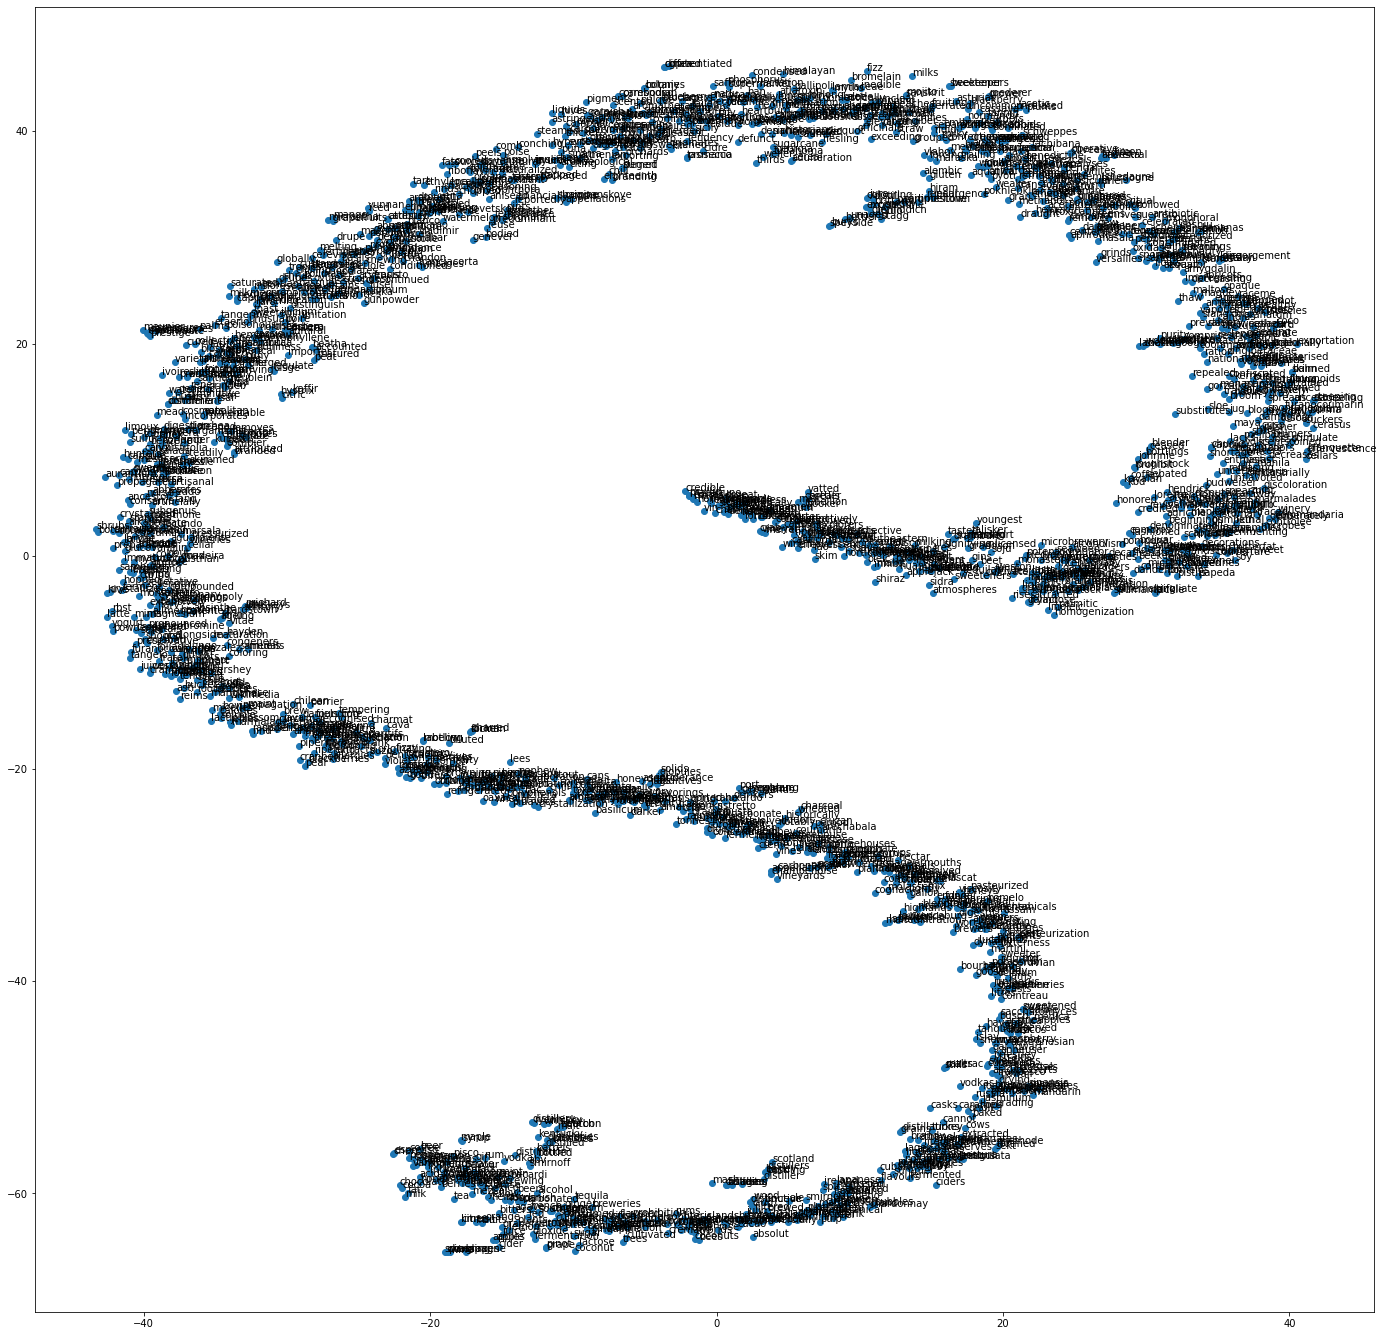

In [18]:
#https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE

vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)